In [1]:
import pandas as pd
import numpy as np
import requests

# Gather

### The WeRateDogs twitter archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### The tweet image predictions

In [3]:
image_prediction_url = ('https://d17h27t6h515a5.cloudfront.net/'
                        'topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
image_prediction_data = requests.get(image_prediction_url).text
with open('image_prediction.tsv', 'w') as file:
    file.write(image_prediction_data)
image_prediction = pd.read_csv('image_prediction.tsv', '\t')

## Each tweet's _retweet count_ and _favorite count_ at minimum after storing all tweets in json format in a file called `tweet_json.txt`

### Let's create the json file first

In [4]:
import os
import tweepy
import json

In [5]:
consumer_key = os.environ.get('consumer_key')
consumer_secret = os.environ.get('consumer_secret')
access_token = os.environ.get('access_token')
access_secret = os.environ.get('access_secret')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as json_file:
        for id_of_tweet in twitter_archive['tweet_id']:
            try:
                tweet_dict = api.get_status(id_of_tweet)._json
            except BaseException as e:
                print(id_of_tweet, e)
                tweet_dict = {}
            finally:
                json_file.write(json.dumps(tweet_dict, ensure_ascii=False) + '\n')
else:
    print('It seems the tweets have already been gathered.')

It seems the tweets have already been gathered.


### Now lets create a DataFrame from it getting _retweet count_ and  _favorite count_

In [7]:
tweets_complete = pd.read_json('tweet_json.txt', lines=True)
tweets = tweets_complete[['id', 'retweet_count', 'favorite_count']].copy()

# Assess

In [8]:
tweets[tweets['id'].isnull()]

,id,retweet_count,favorite_count
19,NaN,NaN,NaN
95,NaN,NaN,NaN
101,NaN,NaN,NaN
118,NaN,NaN,NaN
132,NaN,NaN,NaN
155,NaN,NaN,NaN
247,NaN,NaN,NaN
260,NaN,NaN,NaN
298,NaN,NaN,NaN
382,NaN,NaN,NaN


In [9]:
twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1997,672591271085670400,NaN,NaN,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None
425,821421320206483457,NaN,NaN,2017-01-17 18:17:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He just gradua...,7.823059e+17,4.196984e+09,2016-10-01 19:47:08 +0000,https://twitter.com/dog_rates/status/782305867...,12,10,Sampson,doggo,None,None,None
752,778990705243029504,NaN,NaN,2016-09-22 16:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jay. He's really h*ckin happy about th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778990705...,11,10,Jay,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
1463,694669722378485760,NaN,NaN,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
1525,690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690400367...,10,10,Eriq,None,None,None,None
1144,727286334147182592,NaN,NaN,2016-05-02 23:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I swear to god if we get sent another Blue Mad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727286334...,9,10,None,None,None,None,None
548,805487436403003392,NaN,NaN,2016-12-04 19:02:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sansa and Gary. They run along the fence ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805487436...,12,10,Sansa,None,None,None,None
1653,683462770029932544,NaN,NaN,2016-01-03 01:39:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683462770...,8,10,None,None,None,pupper,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive.iloc[0]['text']

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [12]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
1461,778286810187399168,https://pbs.twimg.com/media/Cs0HuUTWcAUpSE8.jpg,1,Boston_bull,0.322070,True,pug,0.229903,True,muzzle,0.101420,False
1272,750011400160841729,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1,muzzle,0.237620,False,Boston_bull,0.087150,True,sombrero,0.068510,False
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,Japanese_spaniel,0.661178,True,Pekinese,0.150119,True,Chihuahua,0.119720,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
831,693642232151285760,https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg,1,Scottish_deerhound,0.111893,True,bluetick,0.074302,True,German_short-haired_pointer,0.067000,True
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
378,673240798075449344,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,Airedale,0.443004,True,brown_bear,0.114162,False,Chesapeake_Bay_retriever,0.094639,True
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True


In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [14]:
tweets.sample(10)

,id,retweet_count,favorite_count
125,8.686225e+17,5396.0,26729.0
15,8.892788e+17,5280.0,24859.0
1203,7.162855e+17,1157.0,2907.0
819,7.706551e+17,1895.0,7807.0
1974,6.731488e+17,651.0,1731.0
1331,7.055919e+17,1229.0,3326.0
1223,7.142516e+17,895.0,3420.0
765,7.778850e+17,1799.0,6800.0
838,7.675005e+17,2539.0,7974.0
1266,7.098528e+17,1275.0,3671.0


In [15]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
id                2342 non-null float64
retweet_count     2342 non-null float64
favorite_count    2342 non-null float64
dtypes: float64(3)
memory usage: 55.3 KB


## Quality issues

`tweets` table:
1. Some tweets are missing in the `tweets` dataset. Maybe some of the requests failed or the tweets were deleted after the `twitter_archive` was gathered.

`twitter_archive` table:
2.  Some tweets are retweets.
3. `None` values should actually be NaN objects.
4.  `tweet_id` should not be an integer (not ordinal, no mathematical operations will be performed with it).
5.  Shortened URL in `text`.
6.  Not all values in `name` are valid names. We can see names such as "an" or "by"

`image_prediction` table:
7. `img_num` does not provide new information.
8. No prediction for a dog in some rows. Wrong kind of dog is predicted in some rows.

## Tidiness issues

`twitter_archive` table:
9. Doggo, floofer, pupper and puppo should be values of a column called `stage`

Across tables:
10. `tweets` and `twitter_archive` both contain observations for tweet data and should be the same table

# Clean

In [16]:
tweets_clean = tweets.copy()
archive_clean = twitter_archive.copy()
img_prediction_clean = image_prediction.copy()

### Define

1. Remove empty rows with NaN in their ID from the `tweets_clean` dataframe.
2. Remove rows where `retweeted_status_id` is not null.
3. Replace 'None' with np.NaN
4. Convert `tweet_id` column type to string.
5. Remove URLs using a regex.sub.
6. Drop rows that dont match a regex for a valid name pattern.
8. Drop img_num column.
9. Drop rows where there is no dog prediction or best prediction has a chance below .25 of being correct.
10. Use pandas' create a new column called `stage` with the value from `doggo`, `floofer`...
11. Concatenate `tweets` and `archive` tables.

### Code

In [17]:
""" 1. Drop rows where id is NaN.
These were created due to empy lines in the json file because some requests failed. """
tweets_clean = tweets_clean[tweets_clean['id'].isnull() == False]

### Test

In [18]:
tweets_clean[tweets_clean['id'].isnull()]

,id,retweet_count,favorite_count


### Code

In [19]:
""" 2. Remove rows where retweeted_status_id
is not null from archive_clean. """
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull() == True]

### Test

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [21]:
# We can actually get rid of those columns.
archive_clean.drop(columns=['retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],
                            inplace=True)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 178.4+ KB


### Code

In [22]:
""" 3. Replace 'None' strings with np.nan"""
archive_clean = archive_clean.replace('None', np.nan)

### Test

In [23]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 178.4+ KB


### Code

In [24]:
""" 4. Convert tweet_id to string. The same can be done for
the tweets_clean df as well as img_prediction_clean """
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
# For the next one we need to convert to int first otherwise we get scientific notation into the string
tweets_clean['id'] = tweets_clean['id'].astype(np.int64).astype(str)
img_prediction_clean['tweet_id'] = img_prediction_clean['tweet_id'].astype(str)

### Test

In [25]:
archive_clean.dtypes

tweet_id                  object
in_reply_to_status_id    float64
in_reply_to_user_id      float64
timestamp                 object
source                    object
text                      object
expanded_urls             object
rating_numerator           int64
rating_denominator         int64
name                      object
doggo                     object
floofer                   object
pupper                    object
puppo                     object
dtype: object

In [26]:
tweets_clean.dtypes

id                 object
retweet_count     float64
favorite_count    float64
dtype: object

In [27]:
img_prediction_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Code

In [28]:
""" 5.Remove URLs from tweet text using a regex pattern """
archive_clean['text'] = archive_clean['text'].str.replace(r"http(s)?://t.co/\w+", '')

### Test

In [29]:
for text in archive_clean['text']:
    assert 'https://t.co/' not in text

### Code

In [30]:
""" 6. Drop rows where name is does not follow an expected pattern """
# First of all lets drop rows where there is no name
archive_clean = archive_clean[archive_clean['name'].isnull() == False]
archive_clean[archive_clean['name'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
archive_clean = archive_clean[archive_clean['name'].str.contains(r'[A-Z][a-z]+')]

### Test

In [32]:
archive_clean[archive_clean['name'].str.contains(r'^[a-z]+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
archive_clean['name'].value_counts().sample(35)

Barney        1
Ralph         1
Mona          1
Rueben        1
Larry         4
Buddah        1
Herschel      1
Scott         1
Oliviér       2
Vince         1
Kathmandu     1
Rufus         2
Ridley        1
Shaggy        1
Adele         1
Jax           6
Stephanus     1
Romeo         2
Mike          1
Crawford      1
George        4
Ralphé        1
Fido          1
Shikha        1
Amélie        1
Juno          2
Cooper       10
Coleman       1
Flurpson      1
Sandy         2
Puff          1
Ed            1
Jessiga       1
Coopson       1
Harold        2
Name: name, dtype: int64

### Code

In [34]:
""" 7. Drop the img_num column"""
img_prediction_clean.drop(columns=['img_num'], inplace=True)

### Test

In [35]:
assert 'img_num' not in img_prediction_clean.columns

### Code

In [36]:
""" 8. Drop rows where all predictions are not dogs as well as the ones
    where no probability is above 0.25. Only keep the best.
 """
img_prediction_clean = img_prediction_clean[
                    img_prediction_clean['p1_dog'] &
                    img_prediction_clean['p2_dog'] &
                    img_prediction_clean['p3_dog']]

In [37]:
img_prediction_clean = img_prediction_clean[(img_prediction_clean['p1_conf'] > .25) |
                     (img_prediction_clean['p2_conf'] > .25) |
                     (img_prediction_clean['p3_conf'] > .25)]

In [38]:
img_prediction_clean.drop(columns=["p1_dog", "p2",
                                   "p2_conf", "p2_dog",
                                   "p3", "p3_conf", "p3_dog"], inplace=True)

In [39]:
img_prediction_clean.rename(index=str,
                            columns={"p1": "breed_prediction", "p1_conf": "prediction_confidence"},
                            inplace=True)

### Test

In [40]:
img_prediction_clean.sample(25)

,tweet_id,jpg_url,breed_prediction,prediction_confidence
1654,810254108431155201,https://pbs.twimg.com/media/Cz6Z0DgWIAAfdvp.jpg,Staffordshire_bullterrier,0.292556
1959,865718153858494464,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,golden_retriever,0.673664
900,699801817392291840,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,golden_retriever,0.808978
2007,877736472329191424,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,Chesapeake_Bay_retriever,0.837956
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,French_bulldog,0.991650
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,Chihuahua,0.450722
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,beagle,0.848735
1771,827653905312006145,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,collie,0.285555
266,670804601705242624,https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg,Pomeranian,0.868560
910,700747788515020802,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,Great_Pyrenees,0.481333


In [41]:
""" 9. Dog stages should be a variable of a single column, 
    not a column for each variable """
doggo_df = archive_clean[archive_clean['doggo'] == 'doggo'].copy()
doggo_df.drop(columns=['floofer', 'pupper', 'puppo'], inplace=True)
doggo_df.rename(index=str, columns={'doggo': 'stage'}, inplace=True)

floofer_df = archive_clean[archive_clean['floofer'] == 'floofer'].copy()
floofer_df.drop(columns=['doggo', 'pupper', 'puppo'], inplace=True)
floofer_df.rename(index=str, columns={'floofer': 'stage'}, inplace=True)

pupper_df = archive_clean[archive_clean['pupper'] == 'pupper'].copy()
pupper_df.drop(columns=['doggo', 'floofer', 'puppo'], inplace=True)
pupper_df.rename(index=str, columns={'pupper': 'stage'}, inplace=True)

puppo_df = archive_clean[archive_clean['puppo'] == 'puppo'].copy()
puppo_df.drop(columns=['doggo', 'floofer', 'pupper'], inplace=True)
puppo_df.rename(index=str, columns={'puppo': 'stage'}, inplace=True)

In [42]:
archive_clean = pd.concat([doggo_df, floofer_df, pupper_df, puppo_df], sort=False)

### Test

In [43]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1615,685268753634967552,NaN,NaN,2016-01-08 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hubertson. He's a Carmel Haberdashery....,https://twitter.com/dog_rates/status/685268753...,10,10,Hubertson,pupper
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,pupper
1608,685641971164143616,NaN,NaN,2016-01-09 01:59:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. He just passed a cop while going...,https://twitter.com/dog_rates/status/685641971...,7,10,Otis,pupper


### Code

In [44]:
""" 10. Join archive_clean and tweets_clean tables """
tweets_master = archive_clean.merge(tweets_clean, how="inner", left_on="tweet_id", right_on="id")

In [45]:
# Lets also drop the useless in_reply_to_status_id and _user_id columns
tweets_master.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id"], inplace=True)

### Test

In [46]:
tweets_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count
34,845306882940190720,2017-03-24 16:10:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a silly pupper. Thinks ...,https://twitter.com/dog_rates/status/845306882...,12,10,Pickles,pupper,845306882940190720,5739.0,24305.0
58,724405726123311104,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,pupper,724405726123311104,1757.0,5551.0
97,676603393314578432,2015-12-15 03:23:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Godzilla pupper. He had a ruff childho...,https://twitter.com/dog_rates/status/676603393...,9,10,Godzilla,pupper,676603393314578432,411.0,1215.0


### Code

In [47]:
""" 11. Join img_prediction_clean with tweets_master """
tweets_master = tweets_master.merge(img_prediction_clean, how="inner")

In [48]:
tweets_master.drop(columns=["id"], inplace=True)

### Test

In [49]:
tweets_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,breed_prediction,prediction_confidence
0,845397057150107648,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,1926.0,7957.0,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,Dandie_Dinmont,0.394404
1,826848821049180160,2017-02-01 17:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13,10,Cupid,doggo,11120.0,38678.0,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,Great_Pyrenees,0.858764
2,821765923262631936,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,https://twitter.com/dog_rates/status/821765923...,13,10,Duchess,doggo,1819.0,8972.0,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,golden_retriever,0.980071


In [50]:
tweets_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 14 columns):
tweet_id                 77 non-null object
timestamp                77 non-null object
source                   77 non-null object
text                     77 non-null object
expanded_urls            77 non-null object
rating_numerator         77 non-null int64
rating_denominator       77 non-null int64
name                     77 non-null object
stage                    77 non-null object
retweet_count            77 non-null float64
favorite_count           77 non-null float64
jpg_url                  77 non-null object
breed_prediction         77 non-null object
prediction_confidence    77 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 6.3+ KB


### Export

In [51]:
tweets_master.to_csv('twitter_archive_master.csv', encoding='utf-8')

# Analysis and visualization

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 32})
plt.xticks(rotation='horizontal')
%matplotlib inline

In [53]:
tweets_master = pd.read_csv('twitter_archive_master.csv')

### Insight #1 - What dog breeds gets the most favorites in absolute numbers?

In [54]:
favorites_and_breeds = tweets_master[["breed_prediction", "favorite_count"]]

In [55]:
favorites_and_breeds = favorites_and_breeds.groupby('breed_prediction'). \
                        aggregate(np.sum).sort_values(by='favorite_count', ascending=False)

In [56]:
favorites_and_breeds.head(3)

,favorite_count
breed_prediction,
standard_poodle,92192.0
golden_retriever,82471.0
Great_Pyrenees,40030.0


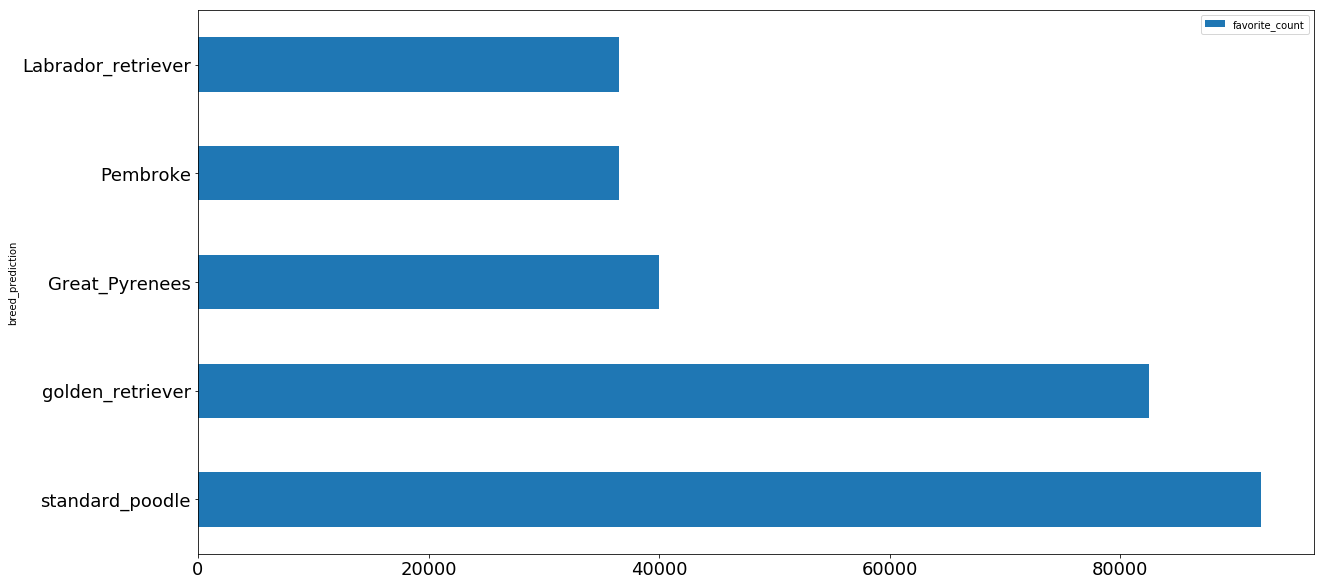

In [57]:
_ = favorites_and_breeds.head().plot.barh(figsize=(20,10), fontsize=18)

### Insight #2-  What dog stage gets the most favorites in absolute numbers?

In [58]:
favs_and_stage = tweets_master[["stage", "favorite_count"]]

In [59]:
favs_and_stage = favs_and_stage.groupby("stage"). \
                        aggregate(np.sum).sort_values(by='favorite_count', ascending=False)
favs_and_stage

,favorite_count
stage,
pupper,393379.0
doggo,224422.0
puppo,85664.0
floofer,6025.0


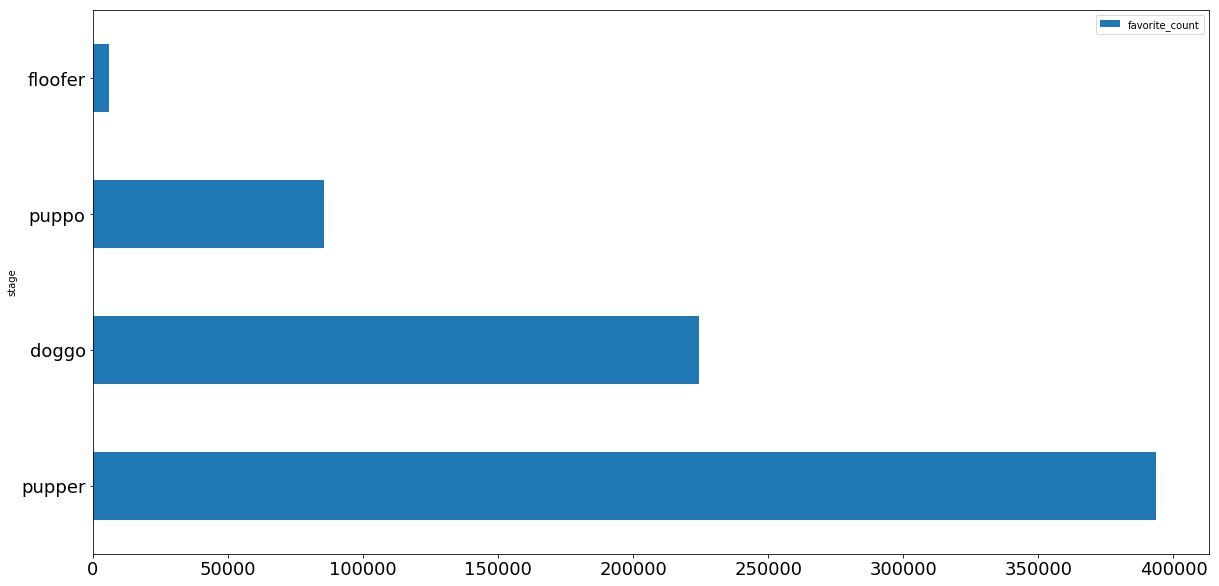

In [60]:
_ = favs_and_stage.plot.barh(figsize=(20,10), fontsize=18)

### Insight #3 - What names get the most favorites in absolute numbers?

In [61]:
favs_and_name = tweets_master[["name", "favorite_count"]]

In [62]:
favs_and_name = favs_and_name.groupby("name"). \
                        aggregate(np.sum).sort_values(by='favorite_count', ascending=False)

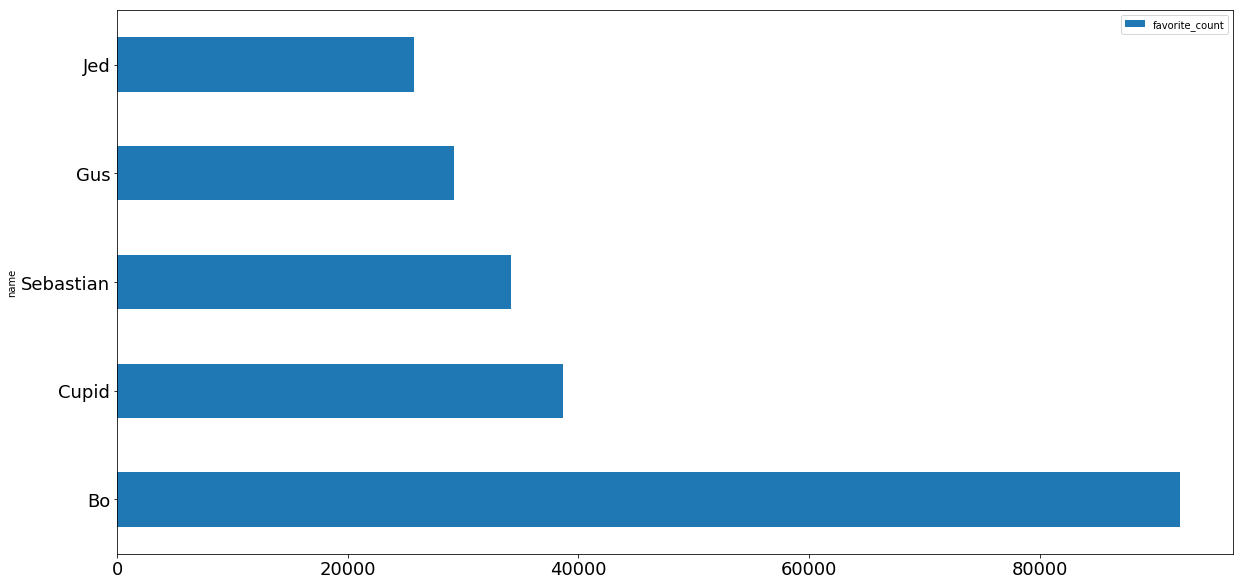

In [63]:
_ = favs_and_name.head().plot.barh(figsize=(20,10), fontsize=18)

In [64]:
tweets_master[tweets_master['name'] == 'Bo']

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,breed_prediction,prediction_confidence
3,3,819004803107983360,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,40172.0,92192.0,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308


This 'Bo' guy is so popular! Checking the tweet you can see that's President Obama's dog, so it all makes sense.

### Insight #4 - Most favorited tweets

In [65]:
tweets_master.sort_values(by="favorite_count", ascending=False).head(3)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,breed_prediction,prediction_confidence
3,3,819004803107983360,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,40172.0,92192.0,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308
1,1,826848821049180160,2017-02-01 17:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13,10,Cupid,doggo,11120.0,38678.0,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,Great_Pyrenees,0.858764
69,69,874012996292530176,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,puppo,10320.0,34159.0,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,Cardigan,0.806674
